## Logistic Population with seasonal birth pattern Differential Equations

In this notebook we will numerically simulate a non-linear population growth with an oscilation due to seasonal birth [1]

In [1]:
## Library
import numpy as np
import math 
import matplotlib.pyplot as plt
# @title Figure Settings
import IPython.display as ipd
from matplotlib import gridspec

import ipywidgets as widgets  # interactive display
%config InlineBackend.figure_format = 'retina'

# use NMA plot style
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/content-creation/main/nma.mplstyle")
my_layout = widgets.Layout()

## Logistic Population Equation
The logistic growth differential equation is a non-linear first order differential equation
\begin{equation}
\frac{d p}{dt}=\alpha_{Birth} p-\alpha_{Death} p^2+p\sin(2\pi t)
\end{equation}
for $a\leq t \leq b$ years, where $\alpha_{Birth}$ is the birth rate and $\alpha_{Death}$ is the death rate, with the initial condition
$$ p(a)=A. $$
The term 
$$p\sin(2\pi t)$$ models a year oscilation due to seasonal birth.

As the equation is non-linear we must numerically approximate the solution.
In this simulation we set the parameters of the different equations:
*  as $\alpha_{Birth}=0.3$ and $\alpha_{Death}=0.01$, with the inital condition $p(0)=3$, over the time period $0\leq t \leq 30$.

In [2]:
alpha_Birth=0.3
alpha_Death=0.01

## Discrete Domain 
To numerically approximate the solution we discretise the continuous domain using a step size, 
$$h=\frac{b-a}{N}=\frac{30-0}{1000}=0.1,$$
which gives
\begin{equation}
t_i=0+i h,
\end{equation}
for $i=0,...1000$.
The figure below illustrate the discrete domain.

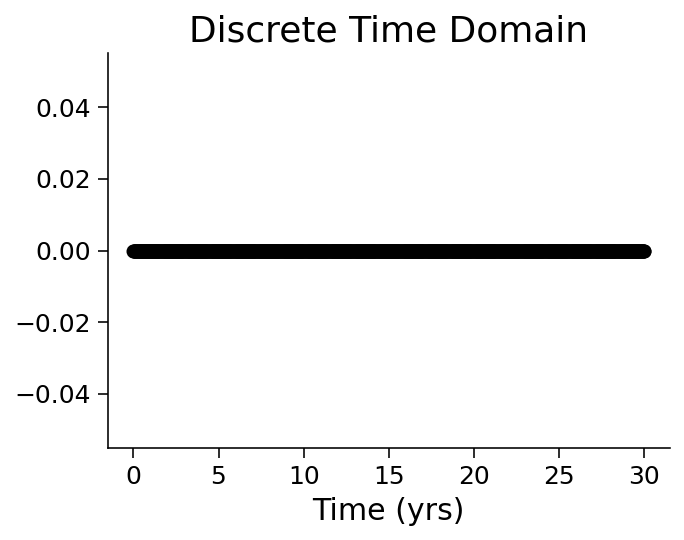

In [3]:
N=1000
b=30
a=0

h=(b-a)/N
t=np.arange(a,b+h/2,h)
fig = plt.figure(1,figsize=(5,4))
ax = fig.add_subplot(1,1,1)
ax.plot(t,0*t,'o:',color='k')
ax.set_xlabel('Time (yrs)')
plt.title('Discrete Time Domain')
plt.show()

In [4]:
P=np.zeros(N+1) # Numerical Solution P
P[0]=3


We numerically approximate the differential equation using Eulers method to give the difference equation
\begin{equation}
\frac{P_{i+1}-P_i}{h}=\alpha_{Birth}P_i-\alpha_{Death}P_i^2+P_i\sin(2\pi t_i)
\end{equation}
re-arranging
\begin{equation}
\color{red}{P_{i+1}}=P_i+h\big(\alpha_{Birth}P_i-\alpha_{Death}P_i^2+P_i\sin(2\pi t_i)\big)
\end{equation}
P[i+1]=P[i]+h*(alpha_Birth*P[i]-                           alpha_Death*P[i]*P[i]+P[i]*np.sin(2*np.math.pi*t[i]))

where $h$ is the stepsize and where $P_i$ is the numerical approximation of $p(t_i)$ at time $t_i$, for $i=0,...,1000$


In [15]:
def Logistic_Pop_Seasonal(alpha_Birth,alpha_Death):
    """
    Args:
      alpha_Birth  : Birth Rate
      alpha_Death : Death Rate

    """
    N=1000
    b=30
    a=0

    h=(b-a)/N
    t=np.arange(a,b+h/2,h)
    N=int((b-a)/h) # Number of Steps
    P=np.zeros(N+1) # Numerical Solution P
    P[0]=3


    for i in range (0,N):
        P[i+1]=P[i]+h*(alpha_Birth*P[i]-alpha_Death*P[i]*P[i]+P[i]*np.sin(2*np.math.pi*t[i]))
                           
    ## Plotting Figure
    fig = plt.figure(1,figsize=(12,6))

    ax = fig.add_subplot(1,1,1)

    ax.plot(t,P,':',color='grey',label='Population')

    ax.legend()

    ax.set_xlabel('Time (yrs)')
    ax.set_ylabel('Population (billions)')
    ax.set_title('Numerical Solution, P')
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()


## Results
The plot bellow shows the Numerical solution $P_i$ of the Logistic Population with oscilation as a function of time $t$.

In [16]:
my_layout.width = '450px'
@widgets.interact(
    alpha_B=widgets.FloatSlider(.3, min=0., max=1., step=.01, layout=my_layout),
    alpha_D=widgets.FloatSlider(.01, min=0.00, max=0.5, step=.01, layout=my_layout)
)
def Pop_widget(alpha_B,alpha_D):
  Logistic_Pop_Seasonal(alpha_Birth=alpha_B,alpha_Death=alpha_D)
  plt.show()

interactive(children=(FloatSlider(value=0.3, description='alpha_B', layout=Layout(width='450px'), max=1.0, ste…

# References

[1] Stover, Christopher and Weisstein, Eric W. "Population Growth." From MathWorld--A Wolfram Web Resource. http://mathworld.wolfram.com/PopulationGrowth.html